Christian Waronsky
======
**Submetric:** Average Household Income (aka Where to Find the Best Things to Steal)

**Description:** This data set shows the average household income, as collected by civilian filled out surveys taken in 2015 but adjusted for modern dollars. This should show where the affluent neighborhoods are, which could give insight to where the most opportunity for stealing big money items is. 

In [5]:
import pandas as pd 
import geopandas 
%matplotlib inline
import matplotlib.pyplot as plt

hIncome = pd.read_csv("HouseholdIncome.csv")

hIncome = hIncome.drop(hIncome.index[71]) #drop South Shore b/c population was 8
hIncome = hIncome.drop(hIncome.index[21]) #drop Chateau b/c population was 3 

#sort through data and calculate average income 
i=0
avgArray = []
maxIndex = len(hIncome.index)
while i < maxIndex:
    totalIncome = 0
    i2 = 4
    neighborhoodPop = 0
    
    while i2 < 33:
    
        popTotal = hIncome.iloc[i, i2] 
        neighborhoodPop += popTotal
        
        if i2 == 4:
            totalIncome += (popTotal * 5000)
        elif i2 == 6:
            totalIncome += (popTotal * 12500)
        elif i2 == 8:
            totalIncome += (popTotal * 17500)
        elif i2 == 10:
            totalIncome += (popTotal * 22500)
        elif i2 == 12:
            totalIncome += (popTotal * 27500)
        elif i2 == 14:
            totalIncome += (popTotal * 32500)
        elif i2 == 16:
            totalIncome += (popTotal * 37500)
        elif i2 == 18:
            totalIncome += (popTotal * 42500)
        elif i2 == 20:
            totalIncome += (popTotal * 47500)
        elif i2 == 22:
            totalIncome += (popTotal * 55000)
        elif i2 == 22:
            totalIncome += (popTotal * 67500)
        elif i2 == 24:
            totalIncome += (popTotal * 87500)
        elif i2 == 26:
            totalIncome += (popTotal * 112500)
        elif i2 == 28:
            totalIncome += (popTotal * 137500)
        elif i2 == 30:
            totalIncome += (popTotal * 175000) 
        elif i2 == 32:
            totalIncome += (popTotal * 250000)
        else: 
            totalIncome = totalIncome
        i2 += 2
         
    average = (totalIncome / neighborhoodPop)
    avgArray.append(average)
    i += 1
        
hIncome["Average Income"] = avgArray
    
hIncomeS = hIncome.sort_values("Average Income") #arrange from least to most wealthy 
hIncomeS["Average Income"].describe()


count        89.000000
mean      55989.121420
std       20655.310967
min       14778.699862
25%       40130.584192
50%       54918.618267
75%       68912.223340
max      108655.606407
Name: Average Income, dtype: float64

Here, I just print out describe details from the average incomes across the neighborhoods. We can see the lowest average income is 14778 dollars and the highest is 108655 dollars. 

In [6]:
#get rid of uneeded columns, I'll admit I could've dropped 

del hIncomeS['Id']
del hIncomeS['Margin of Error; Total:']
del hIncomeS['Margin of Error; Total: - Less than $10,000']
del hIncomeS['Margin of Error; Total: - $10,000 to $14,999']
del hIncomeS['Margin of Error; Total: - $15,000 to $19,999']
del hIncomeS['Margin of Error; Total: - $20,000 to $24,999']
del hIncomeS['Margin of Error; Total: - $25,000 to $29,999']
del hIncomeS['Margin of Error; Total: - $30,000 to $34,999']
del hIncomeS['Margin of Error; Total: - $35,000 to $39,999']
del hIncomeS['Margin of Error; Total: - $40,000 to $44,999']
del hIncomeS['Margin of Error; Total: - $45,000 to $49,999']
del hIncomeS['Margin of Error; Total: - $50,000 to $59,999']
del hIncomeS['Margin of Error; Total: - $60,000 to $74,999']
del hIncomeS['Margin of Error; Total: - $75,000 to $99,999']
del hIncomeS['Margin of Error; Total: - $100,000 to $124,999']
del hIncomeS['Margin of Error; Total: - $125,000 to $149,999']
del hIncomeS['Margin of Error; Total: - $150,000 to $199,999']
del hIncomeS['Margin of Error; Total: - $200,000 or more']

#find and print out three least wealthy neighborhoods
print("The lowest average income neighborhood is: ")
h = hIncomeS.head(3)
display(h)

The lowest average income neighborhood is: 


,Neighborhood,Estimate; Total:,"Estimate; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Estimate; Total: - $20,000 to $24,999","Estimate; Total: - $25,000 to $29,999","Estimate; Total: - $30,000 to $34,999","Estimate; Total: - $35,000 to $39,999","Estimate; Total: - $40,000 to $44,999","Estimate; Total: - $45,000 to $49,999","Estimate; Total: - $50,000 to $59,999","Estimate; Total: - $60,000 to $74,999","Estimate; Total: - $75,000 to $99,999","Estimate; Total: - $100,000 to $124,999","Estimate; Total: - $125,000 to $149,999","Estimate; Total: - $150,000 to $199,999","Estimate; Total: - $200,000 or more",Average Income
6,Bedford Dwellings,723.0,307.0,129.0,91.0,60.0,77.0,22.0,23.0,0.0,0.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,14778.699862
4,Arlington Heights,144.0,48.0,23.0,43.0,0.0,8.0,17.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,17291.666667
58,Northview Heights,510.0,256.0,94.0,35.0,11.0,22.0,32.0,28.0,0.0,12.0,0.0,11.0,0.0,3.0,0.0,6.0,0.0,18539.215686


Here, I have printed out the three neighborhoods with the lowest average incomes. They are Bedford Dwellings, Arlington Heights and Northview Heights, none of which exceed 20000 dollars. The breakdowns by category can also be seen above. 

In [20]:
#find and print out highest income neighborhoods
#Also reset the indexes so we can use it for our final scoring system 
print("The highest average income neighborhood is: ") 
hIncomeS = hIncomeS.reset_index(drop=True)
topIncome = hIncomeS.tail(30)
topIncome = topIncome.sort_values("Average Income", ascending = False)
topIncome = topIncome.reset_index(drop =True)
topIncome

The highest average income neighborhood is: 


,Neighborhood,Estimate; Total:,"Estimate; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Estimate; Total: - $20,000 to $24,999","Estimate; Total: - $25,000 to $29,999","Estimate; Total: - $30,000 to $34,999","Estimate; Total: - $35,000 to $39,999","Estimate; Total: - $40,000 to $44,999","Estimate; Total: - $45,000 to $49,999","Estimate; Total: - $50,000 to $59,999","Estimate; Total: - $60,000 to $74,999","Estimate; Total: - $75,000 to $99,999","Estimate; Total: - $100,000 to $124,999","Estimate; Total: - $125,000 to $149,999","Estimate; Total: - $150,000 to $199,999","Estimate; Total: - $200,000 or more",Average Income
0,Strip District,520.0,8.0,14.0,22.0,14.0,0.0,8.0,0.0,23.0,25.0,51.0,51.0,51.0,51.0,75.0,44.0,83.0,108655.606407
1,Regent Square,476.0,10.0,22.0,24.0,12.0,10.0,12.0,9.0,16.0,17.0,39.0,56.0,52.0,47.0,38.0,59.0,53.0,104639.479905
2,Point Breeze,2342.0,144.0,91.0,85.0,44.0,91.0,35.0,33.0,77.0,74.0,205.0,103.0,245.0,229.0,138.0,266.0,482.0,99993.279570
3,Squirrel Hill North,3370.0,283.0,98.0,101.0,88.0,101.0,74.0,107.0,47.0,86.0,59.0,285.0,321.0,347.0,69.0,369.0,935.0,97740.246407
4,North Shore,154.0,0.0,0.0,4.0,7.0,0.0,25.0,0.0,0.0,0.0,30.0,8.0,37.0,30.0,0.0,13.0,0.0,96931.818182
5,Fairywood,428.0,4.0,24.0,9.0,12.0,16.0,9.0,7.0,9.0,0.0,7.0,80.0,154.0,79.0,10.0,0.0,8.0,93922.619048
6,New Homestead,379.0,0.0,10.0,28.0,27.0,15.0,9.0,15.0,31.0,13.0,32.0,38.0,72.0,25.0,31.0,33.0,0.0,91616.094987
7,Swisshelm Park,577.0,21.0,21.0,37.0,14.0,32.0,18.0,17.0,14.0,16.0,41.0,94.0,115.0,63.0,34.0,26.0,14.0,87597.690941
8,Duquesne Heights,1170.0,78.0,41.0,63.0,68.0,87.0,52.0,28.0,10.0,89.0,54.0,88.0,228.0,110.0,37.0,91.0,46.0,83620.996441
9,Summer Hill,517.0,6.0,5.0,9.0,16.0,29.0,23.0,29.0,49.0,17.0,85.0,49.0,93.0,64.0,27.0,6.0,10.0,80044.378698


Next, I have printed out the three neighborhoods with the highest average incomes. They are Strip District, Regent Square and Point Breeze, all of which exceed 99990 dollars. The breakdowns by category can also be seen above. 

Text(0, 0.5, 'Average Household Income (in 2022-adjusted US dollars)')

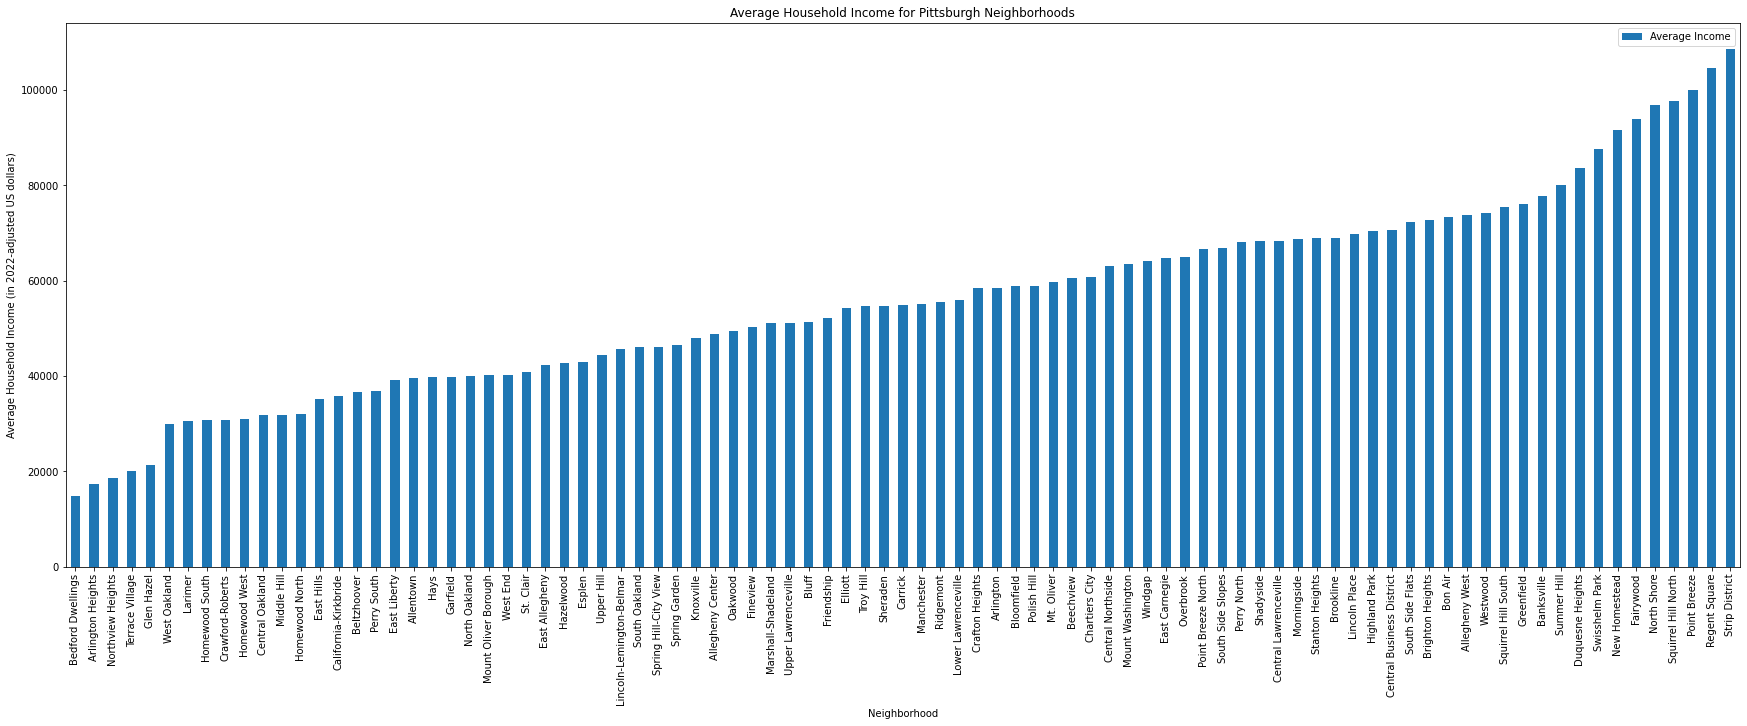

In [4]:
#drop some columns and pop average income into a bar graph
hIncomeS = hIncomeS.drop(hIncomeS.iloc[:, 1:18], axis = 1)
hIncomeS.plot.bar( x = "Neighborhood", figsize = (30,10))

plt.title("Average Household Income for Pittsburgh Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Average Household Income (in 2022-adjusted US dollars)")


Then, I plotted that data in a bar graph to help visualize the data. 

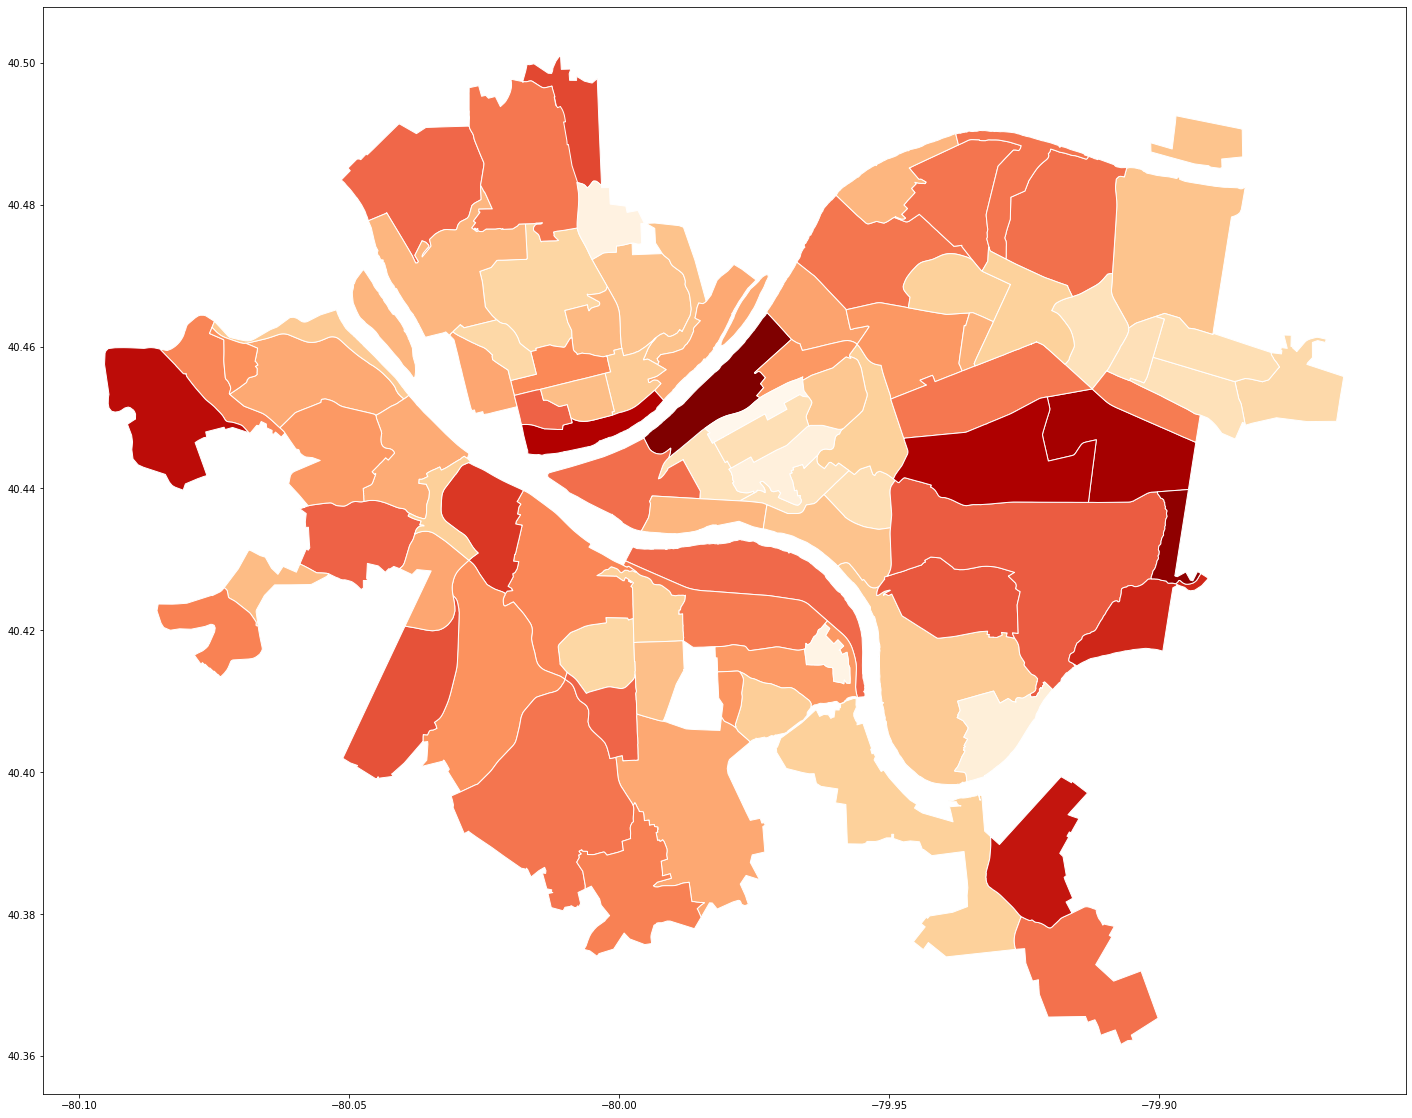

In [4]:
#geopandas this thing
neighborhoods = geopandas.read_file("neighborhood/Neighborhoods_.shp")

hIncome_map = neighborhoods.merge(hIncomeS, how='left', left_on='hood', right_on='Neighborhood')
hIncome_map.plot(column='Average Income', cmap='OrRd', edgecolor="white", figsize=(30, 20))

Finally, I used geopandas and made a heat map to show the average household income distribution across all the neighborhoods in the city. 

Conclusion 
=
Judging by my data and the analysis thereof, I declare the Strip District as the most affluent neighborhood in Pittsburgh in terms of average household income. We must remember and consider, however, that this data is not all encompassing due to the relatively low and inconsistent sample size. It was updated last in 2015, so there is a chance for change, especially when considering the drastic change in political climate in years since. Nonetheless, average household income doesn't change as drastically and, thus, this data still gives us a general idea of what neighborhood is best for high household income. 

And you know what comes next... a well-worded phrase: where wealth sits, crime creeps. My data says that the money, in terms of household income, is in the Strip District. With that wealth, comes loaded wallet, expensive jewelry, and designer bags. In other words, a whole bunch of to-steal items. The higher the income, the more a criminal should want to be there. 
![BadMo]